# Bucket Sort

### Imports

In [1]:
import numpy as np
import sys
import matplotlib.pyplot as plt

## De split
Hier worden de positieve en negatieve getallen van elkaar gescheiden, daarna worden de negatieve getallen postieve gemaakt. Nadat de positieve en negatieve (tijdelijk positief) getallen gesorteerd zijn, worden de negatieve getallen weer negatief gemaakt en daarna worden ze omgedraaid. Dat allemaal om daarna weer samen gevoegd te worden met de andere lijst. Als dat allemaal gebuirt is is de lijst gesorteerd.

In [2]:
def bucket_sort_split(data):
    
    negatieve = [] # lijst waar alle negatieve getallen in gaan
    positieve = [] # lijst waar alle positieve getallen in gaan
    for i in data: # de for-loop die de getallen splitst
        if i < 0: 
            negatieve.append(i) 
        else:
            positieve.append(i)
            
    positieve_negatieve = [ -1 * x for x in negatieve] # maakt alle negatieve getallen positief
    
    sorteer_negatieve = bucket_sort(positieve_negatieve) # roept de functie aan die de getallen gaat sorteren
    sorteer_positieve = bucket_sort(positieve)
    
    sorteer_negatieve = [ -x for x in sorteer_negatieve] # maakt de gesorteerde 'negatieve' getallen weer negatief
    
    sorteer_negatieve = sorteer_negatieve[::-1] # flipt de negatieve lijst
    
    return sorteer_negatieve + sorteer_positieve

## Het sorteren
Hier worden de lijsten gesorteerd, eerst word er gekeken wat het langste getal is en de buckets worden aangemaakt. Daarna komt er een for-loop, in die for-loop word eerst gekeken of de lengte van getal 'i' kleiner is dan de teller. Als dat het geval is, word er gekekeken naar het laatste nummer van het getal, gebasseerd op het laastste getal wordt het in een bucket gedaan. Nadat alle getallen in de lijst geweest zijn gaat de teller één omhoog (de teller is dan 1, dan wordt de volgende loop gekeken naar het één-na-laatste getal) en wordt de bucket toegevoegd aan een nieuwe array. Als de max_lengte (lengte van langste getal) nog niet behaald is door de teller gaat de functie nog een keer runnen met de nieuwe data. Als een van de getallen niet kleiner is dan de teller wordt het getal automatisch in de meest linker bucket gedaan (0 dus). Dit allemaal om de getallen in de goede volgorde te krijgen. Hieronder een voorbeeld met de getallen: 324, 1 en 35. ![alt text](bucketsort.png "Title")

In [3]:
def bucket_sort(data, teller=0):

    #teller = 0 dit werkt niet, wordt elke keer weer naarr 0 gezet, daarom in parameter van func
    max_lengte = len(str(max(data))) # kijkt naar de lengste van het grootste getal.

    if len(data) == 0:
        print('Er is geen data ingevoerd') # als er geen lijst gegeven wordt komt deze message in beeld

    buckets = [[], [], [], [], [], [], [], [], [], []] # 10 'buckets' gemaakt

    for i in data:
        if (teller >= len(str(i))): # als de lengte van 'i' gelijk of groter is dan de teller wordt het getal naar 
            # het meest linker bucket gedaan
            buckets[0].append(i)
        else:
            laatste_nummer = str(i)[-1 - teller] # het nummer waar naar gekeken wordt, in de eerste loop is dit de laatste, 
            # daarna de een-na-laatste etc.
            bucket_nummer = int(laatste_nummer) # De bucket waar het getal in gaat
            buckets[bucket_nummer].append(i) # voegt het nummer toe in de juiste bucket
            
    teller += 1 # verhoogd de teller met één

    data2 = []
    for i in buckets: # voegt de buckets inclusief de toegevoegde waardes van de for loop hierboven toe aan een niewe array
        data2 += i 
        
    if teller >= max_lengte: # als de teller gelijk of groter is dan de lengte van het grootste getal van de array stopt 
        # de iteratie en wordt de data weergegeven (wat als het goed is gesorteerd is, als het programma werkt)
        return data2
    else: 
        return bucket_sort(data2, teller=teller) # als de teller nog niet gelijk of groter is als max_lengte wordt deze functie
    # weer aangeroepen maar dan met de nieuwe array die hebben gemaakt bij 'data2'.

In [4]:
bucket_sort_split([12, 4, -324, -1, 85, 64, -35, 6450, 122])

[-324, -35, -1, 4, 12, 64, 85, 122, 6450]

## Lijsten maken
Hier maak ik de arrays aan om de Bucket Sort te testen op grote arrays.

In [5]:
duizend = np.random.randint(-1000000, 1000000, size=1000)
tien_duizend = np.random.randint(-1000000, 1000000, size=10000)
honderd_duizend = np.random.randint(-1000000, 1000000, size=100000)
miljoen = np.random.randint(-1000000, 1000000, size=1000000)
# miljard = np.random.randint(-1000000, 1000000, size=1000000000) doe maar niet...

## Testing
Hier test ik of de Bucket List sort het goed gesorteerd heeft, dat doe ik door het te vergelijken met de ingebouwde sorteer functie van Python.

In [6]:
bucket_sort_split(duizend) == sorted(duizend)

True

In [7]:
bucket_sort_split(tien_duizend) == sorted(tien_duizend)

True

In [8]:
bucket_sort_split(honderd_duizend) == sorted(honderd_duizend)

True

In [9]:
bucket_sort_split(miljoen) == sorted(miljoen)

True

### Conclusie
De conclusie van dit mini-onderzoek is dat de Bucket Sort alle drie de arrays goed gesorteerd heeft.

## Hoelang duurt het?
In de volgende paar blokjes gaan we kijken hoelang de functie er over doet om alles goed te sorteren.

In [10]:
%timeit bucket_sort_split(duizend)

8.27 ms ± 323 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [11]:
%timeit bucket_sort_split(tien_duizend)

84.9 ms ± 2.92 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [12]:
%timeit bucket_sort_split(honderd_duizend)

849 ms ± 9.35 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [14]:
%timeit bucket_sort_split(miljoen)

9.44 s ± 234 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


Text(0.5, 1.0, 'Tjdsduur verschillende lengte lijsten')

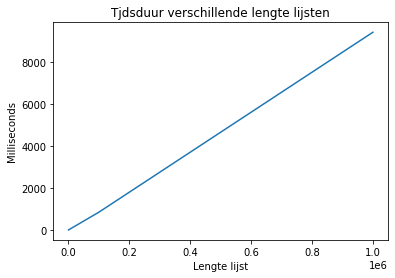

In [15]:
plt.plot([1000, 10000, 100000, 1000000], [8.27, 84.9, 849, 9440])
plt.ylabel('Milliseconds')
plt.xlabel('Lengte lijst')
plt.title('Tjdsduur verschillende lengte lijsten')

### Conclusie runtime
In de tijden zie je dat per stap in lijst grote (1000 naar 10000 naar 100k etc.) de tijd ongeveer 10 keer zo lang duurt. Wat toevallig ook de toename is per lijst stap, 1000 x 10 = 10k etc. Dus de twee hebben een lineair verband.

Let op de x-as is in wetenschappelijke notatie.

## Hoeveel ruimte neemt het in?
Hier gaan we kijken hoeveel ruimte de functie inneemt met verschillende lengte arrays. We kijken naar het aantal Bytes dat het geheugen gebruikt.

In [16]:
sys.getsizeof(bucket_sort_split(duizend))

8056

In [17]:
sys.getsizeof(bucket_sort_split(tien_duizend))

80056

In [18]:
sys.getsizeof(bucket_sort_split(honderd_duizend))

800056

In [19]:
sys.getsizeof(bucket_sort_split(miljoen))

8000056

Text(0.5, 1.0, 'Ruimte nodig verschillende lengte lijsten')

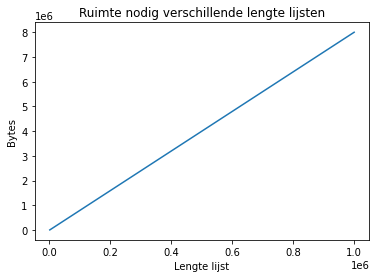

In [20]:
plt.plot([1000, 10000, 100000, 1000000], [8056, 80056, 800056, 8000056])
plt.ylabel('Bytes')
plt.xlabel('Lengte lijst')
plt.title('Ruimte nodig verschillende lengte lijsten')

### Conclusie ruimte
Ook hier zie het lineaire verband weer terug, per stap in lijst grote neem de ruimte die nodig is ook met (ongeveer) 10  keer toe.

Let op de x en y-as is in wetenschappelijke notatie.

### Bruikbaarheid
Dit algoritme is goed te gebruiken op kleine tot medium grote arrays, als het richting de miljoen gaat duurt het toch wel iets te lang. Dan kan beter een ander algoritme gebruikt worden.